<a href="https://colab.research.google.com/github/oreomcflurryyy/data-analysis/blob/main/heart_disease_uci_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Collection and Import**

In [186]:
!pip install ISLP

In [187]:
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize)

In [188]:
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import \
     (LinearDiscriminantAnalysis as LDA,
      QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Download the required dataset [UCI Heart Disease Data](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data/data).

In [246]:
data = pd.read_csv('/content/heart_disease_uci.csv')
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


# **Exploratory Data Analysis (EDA)**

## 1. Count Plots
- Visualize Frequency Distribution of categorical variables
- Quick Overview of data imbalances
- Identify Dominant Categories in the dataset

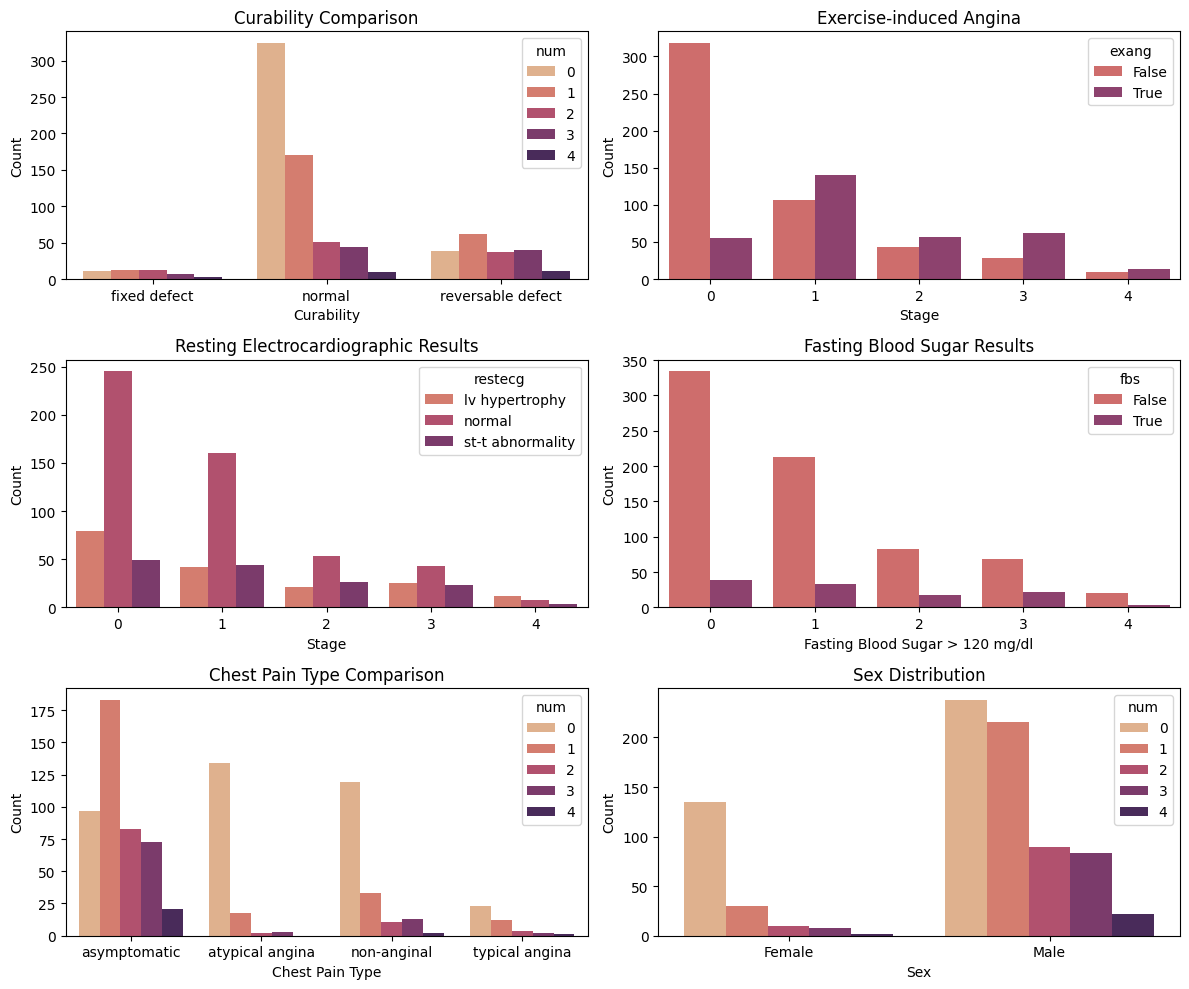

In [233]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

# Plot-1 for Curability comparison
sns.barplot(x='thal', y='count', hue='num', data=data.groupby(['num', 'thal'])['id'].count().reset_index(name='count'), ax=axes[0,0], palette='flare')
axes[0,0].set_xlabel('Curability')
axes[0,0].set_ylabel('Count')
axes[0,0].set_title('Curability Comparison')

# Plot-2 for Exercise-induced Angina
sns.barplot(x='num', y='count', hue='exang', data=data.groupby(['num', 'exang'])['id'].count().reset_index(name='count'), ax=axes[0,1], palette='flare')
axes[0,1].set_xlabel('Stage')
axes[0,1].set_ylabel('Count')
axes[0,1].set_title('Exercise-induced Angina')

# Plot-3 for Resting Electrocardiographic results
sns.barplot(x='num', y='count', hue='restecg', data=data.groupby(['num', 'restecg'])['id'].count().reset_index(name='count'), ax=axes[1,0], palette='flare')
axes[1,0].set_xlabel('Stage')
axes[1,0].set_ylabel('Count')
axes[1,0].set_title('Resting Electrocardiographic Results')

# Plot-4 for Fasting Blood Sugar results
sns.barplot(x='num', y='count', hue='fbs', data=data.groupby(['num', 'fbs'])['id'].count().reset_index(name='count'), ax=axes[1,1], palette='flare')
axes[1,1].set_xlabel('Fasting Blood Sugar > 120 mg/dl')
axes[1,1].set_ylabel('Count')
axes[1,1].set_title('Fasting Blood Sugar Results')

# Plot-5 for Chest Pain Type comparison
sns.barplot(x='cp', y='count', hue='num', data=data.groupby(['num', 'cp'])['id'].count().reset_index(name='count'), ax=axes[2,0], palette='flare')
axes[2,0].set_xlabel('Chest Pain Type')
axes[2,0].set_ylabel('Count')
axes[2,0].set_title('Chest Pain Type Comparison')

# Plot-6 for Sex distribution
sns.barplot(x='sex', y='count', hue='num', data=data.groupby(['num', 'sex'])['id'].count().reset_index(name='count'), ax=axes[2,1], palette='flare')
axes[2,1].set_xlabel('Sex')
axes[2,1].set_ylabel('Count')
axes[2,1].set_title('Sex Distribution')

plt.tight_layout()
plt.show()

Creating a binary indicator for heart disease based on the `num` column, simplifying the analysis of heart disease presence.

In [234]:
data['heart_disease'] = data['num'].apply(lambda x: 0 if x == 0 else 1)
total_patients = len(data)

In [235]:
print(f"Number of patients with normal healthy heart = {138/total_patients * 100:.0f}% as compared to heart disease patients with normally functioning heart = {58/total_patients * 100:.1f}%")
print(f"Percentage of patients with reversible defects for both healthy heart and person with heart disease (at any stage),\n is a close range of about = {len(data[(data['num'] == 1) & (data['thal'] == 'normal')]) / total_patients * 100:.1f}% to {len(data[(data['num'] == 1) & (data['thal'] == 'reversable defect')]) / total_patients * 100:.1f}% except stage 4 cardiac disease.")
print(f"Percenatge of defects fixed is quite low for all cases, about less than {len(data[(data['num'] == 1) & (data['thal'] == 'fixed defect')]) / total_patients * 100:.1f}% cases are fixed.")
data.groupby(['heart_disease', 'thal'])['id'].count()

Number of patients with normal healthy heart = 17% as compared to heart disease patients with normally functioning heart = 7.0%
Percentage of patients with reversible defects for both healthy heart and person with heart disease (at any stage),
 is a close range of about = 20.5% to 7.4% except stage 4 cardiac disease.
Percenatge of defects fixed is quite low for all cases, about less than 1.6% cases are fixed.


heart_disease  thal             
0              fixed defect          11
               normal               324
               reversable defect     38
1              fixed defect          35
               normal               276
               reversable defect    150
Name: id, dtype: int64

In [236]:
print(f"Number of patients with asymptomatic angina having heart disease = {392/total_patients * 100:.2f}%\nThis is {392/104:.1f}x times the patients having healthy heart showing the same chest pain type.")
print(f"Number of patients with atypical angina not having heart disease = {150/total_patients * 100:.2f}%\nThis is the highest percentage of patients having healthy heart exhibiting chest paim.")
data.groupby(['cp', 'heart_disease'])['id'].count()

Number of patients with asymptomatic angina having heart disease = 47.00%
This is 3.8x times the patients having healthy heart showing the same chest pain type.
Number of patients with atypical angina not having heart disease = 17.99%
This is the highest percentage of patients having healthy heart exhibiting chest paim.


cp               heart_disease
asymptomatic     0                 97
                 1                360
atypical angina  0                134
                 1                 23
non-anginal      0                119
                 1                 59
typical angina   0                 23
                 1                 19
Name: id, dtype: int64

In [237]:
female_patients = len(data[data['sex'] == 'Female'])
male_patients = len(data[data['sex'] == 'Male'])
print(f"Total number of patients = {total_patients}")
print(f"Number of female patients = {female_patients}")
print(f"Number of male patients = {male_patients}")
print(f"Percentage of female patients with heart disease = {50/female_patients * 100:.2f}%")
print(f"Percentage of male patients with heart disease = {459/male_patients * 100:.2f}%")
data.groupby(['sex', 'heart_disease'])['id'].count()

Total number of patients = 834
Number of female patients = 185
Number of male patients = 649
Percentage of female patients with heart disease = 27.03%
Percentage of male patients with heart disease = 70.72%


sex     heart_disease
Female  0                135
        1                 50
Male    0                238
        1                411
Name: id, dtype: int64

### **I. Key Findings from Heart Disease Analysis** 📊

#### 1. Disease Curability Analysis
- **Critical Finding**: Heart conditions show normal curability at initial stages
- **Warning Sign**: Curability significantly decreases in stages 3-4
- **Clinical Implication**: Advanced stages (3-4) typically show irreversible damage

#### 2. Exercise-Induced Angina Patterns
- Higher prevalence in advanced disease stages
- Strong correlation with disease progression
- Reliable indicator for heart disease diagnosis

#### 3. Electrocardiographic Results
- **Healthy Hearts**: Minimal abnormalities/hypertrophy
- **Diseased Hearts**: Increased abnormalities with disease progression
- Clear correlation between ECG anomalies and disease severity

#### 4. Blood Sugar Analysis
```
🔴 High Risk: >120mg/dl (toxic range)
🟢 Low Risk: Normal blood sugar levels
```

#### 5. Chest Pain Classification
| Pain Type | Correlation with Heart Disease |
|-----------|-------------------------------|
| Asymptomatic | Strong positive correlation |
| Typical Angina | Moderate correlation |
| Non-angina/Atypical | Negative correlation |

#### 6. Gender Distribution
- **Sample Bias**: Higher male representation in dataset
- **Key Observation**: Males show higher susceptibility to heart disease
- **Note**: Further gender-balanced studies recommended

---
*Note: This analysis is based on the available dataset and may require additional validation with larger, more diverse samples.*

## 2. Distribution Plots
- Understand distribution (normal, skewed, etc.)
- Overlay distributions for different categories for comparison

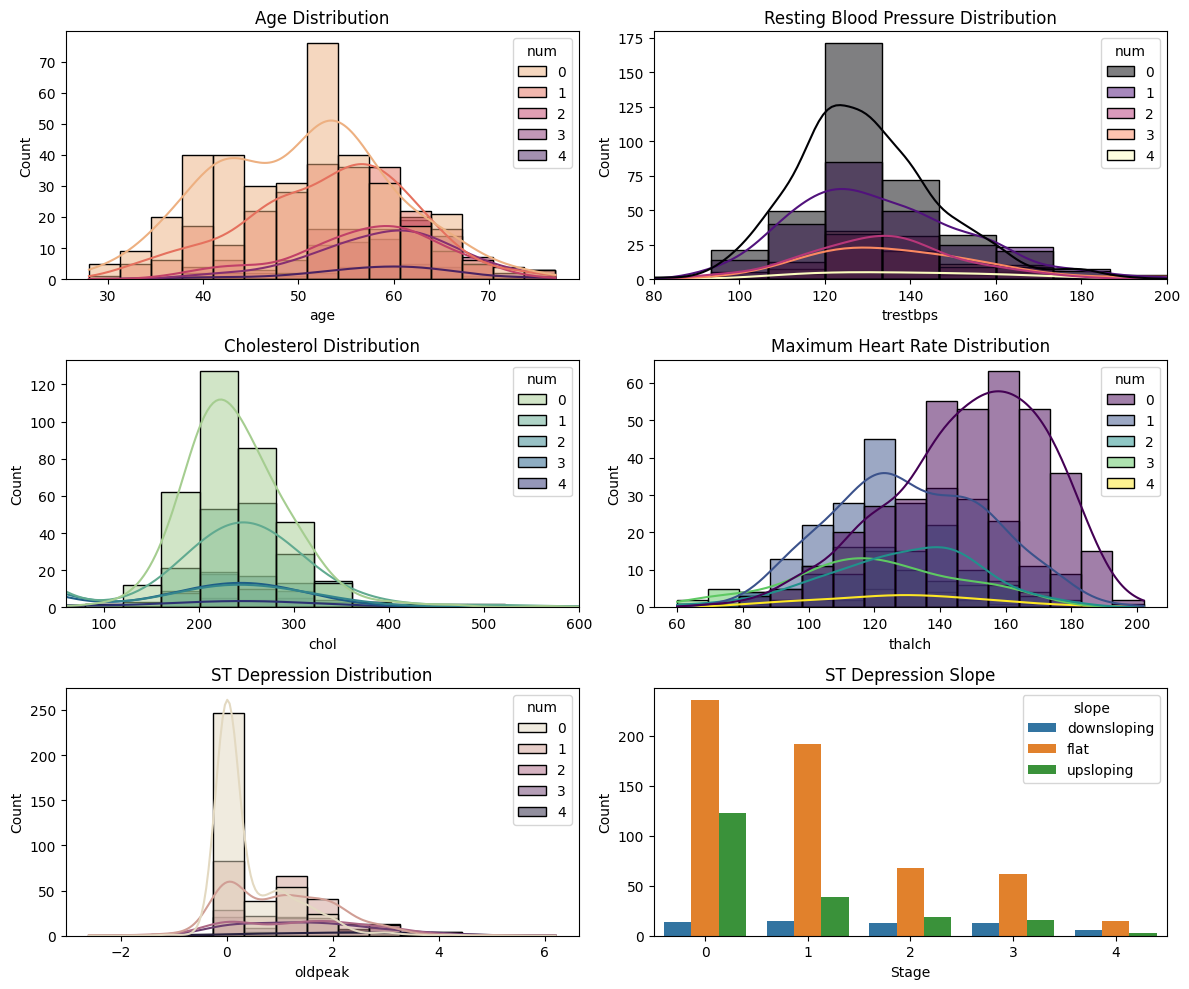

In [238]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

# Plot-1 for count of type vs results
sns.histplot(data=data, x='age', ax = axes[0,0], hue='num', kde=True, palette='flare', bins=15)
axes[0,0].set_title('Age Distribution')

# Plot-2 for count of type vs results
sns.histplot(data=data, x='trestbps', ax = axes[0,1], hue='num', kde=True, palette='magma', bins=15)
axes[0,1].set_title('Resting Blood Pressure Distribution')
axes[0,1].set_xlim(80,200)

# Plot-3 for count of type vs results
sns.histplot(data=data, x='chol', ax = axes[1,0], hue='num', kde=True, palette='crest', bins=15)
axes[1,0].set_title('Cholesterol Distribution')
axes[1,0].set_xlim(60,600)

# Plot-4 for count of type vs results
sns.histplot(data=data, x='thalch', ax = axes[1,1], hue='num', kde=True, palette='viridis', bins=15)
axes[1,1].set_title('Maximum Heart Rate Distribution')

# Plot-5 for count of type vs results
sns.histplot(data=data, x='oldpeak', ax = axes[2,0], hue='num', kde=True, palette='ch:s=-.2,r=.6', bins=15)
axes[2,0].set_title('ST Depression Distribution')

# Plot-6 for Slope of the Peak Exercise ST Segment
sns.barplot(x='num', y='count', hue='slope', data=data.groupby(['num', 'slope'])['id'].count().reset_index(name='count'), ax=axes[2,1])
axes[2,1].set_xlabel('Stage')
axes[2,1].set_ylabel('Count')
axes[2,1].set_title('ST Depression Slope')

plt.tight_layout()
plt.show()

The code groups the dataset by heart disease stages (`num`), calculates the median and mode of ages for each stage, and handles potential errors in mode calculation.

In [239]:
grouped_data = data.groupby('num')['age']

def mode(x):
  try:
    return x.mode()[0]
  except:
    return np.nan

summary_stats = grouped_data.agg(['median', mode])
summary_stats

,median,mode
num,,
0,51.0,54
1,54.0,57
2,58.0,56
3,60.0,61
4,59.0,58


In [240]:
print(f"Number of patients with upsloping slope = {len(data[data['slope'] == 'upsloping']) / total_patients * 100:.2f}%")
print(f"Number of patients with flat slope = {len(data[data['slope'] == 'flat']) / total_patients * 100:.2f}%")
print(f"Number of patients with downsloping slope = {len(data[data['slope'] == 'downsloping']) / total_patients * 100:.2f}%")

Number of patients with upsloping slope = 23.98%
Number of patients with flat slope = 68.71%
Number of patients with downsloping slope = 7.31%


### **Key Findings from Heart Disease Analysis** 🫀

#### 1. Age-Related Patterns
- **High Risk Age Group**: 55+ years
- **Critical Range**: 55-65 years
  - Highest incidence of Stage 2-4 heart conditions
- **Key Observation**: Age correlates strongly with disease severity

#### 2. Blood Pressure Analysis
```
🟢 Healthy Range: < 120 mmHg
🟡 Elevated Range: 120-129 mmHg (common in adults)
🔴 High Risk: > 129 mmHg
```
*Note: Elevated BP may indicate conditions unrelated to heart disease*

#### 3. Cholesterol Levels
| Range (mg/dL) | Classification |
|---------------|----------------|
| 170-200 | Healthy Range |
| > 200 | Increased Risk |

- **Finding**: Direct correlation between cholesterol levels and heart disease risk
- **Impact**: Multiple factors influence abnormal levels

#### 4. ST Segment Analysis
##### Distribution of Slopes:
- **Upsloping**: Normal finding
  - Indicates balanced autonomic nervous system
  - Associated with healthy heart
- **Flat Slope**: Higher risk indicator
- **Downsloping**: Rare occurrence (6.85% of cases)
  - Requires careful monitoring

---
*Note: These findings are based on statistical analysis of the available dataset and should be interpreted within clinical context.*

## 3. Scatter Plots
- Identifies trends and patterns (linear, curved, clustered)
- Shows how data points are spread, helping in forecasting trend

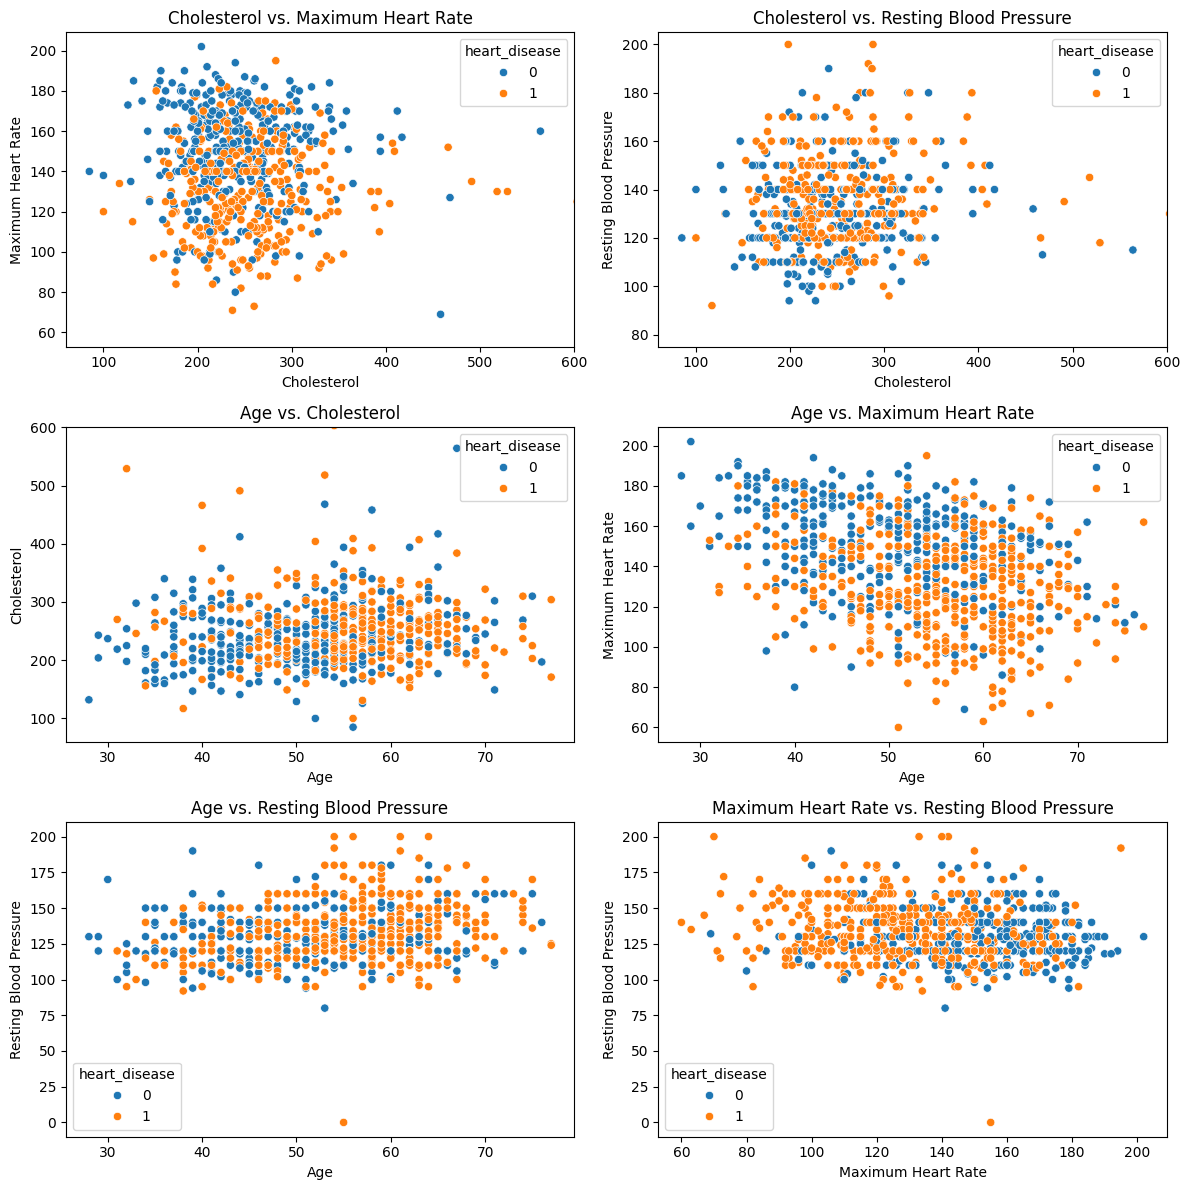

In [241]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Plot 1: Cholesterol vs. Maximum Heart Rate
sns.scatterplot(x='chol', y='thalch', data=data, hue='heart_disease', ax=axes[0, 0])
axes[0, 0].set_title('Cholesterol vs. Maximum Heart Rate')
axes[0, 0].set_xlabel('Cholesterol')
axes[0, 0].set_ylabel('Maximum Heart Rate')
axes[0, 0].set_xlim(60, 600)

# Plot 2: Cholesterol vs. Resting Blood Pressure
sns.scatterplot(x='chol', y='trestbps', data=data, hue='heart_disease', ax=axes[0, 1])
axes[0, 1].set_title('Cholesterol vs. Resting Blood Pressure')
axes[0, 1].set_xlabel('Cholesterol')
axes[0, 1].set_ylabel('Resting Blood Pressure')
axes[0, 1].set_xlim(60, 600)
axes[0, 1].set_ylim(75, 205)

# Plot 3: Age vs. Cholesterol
sns.scatterplot(x='age', y='chol', data=data, hue='heart_disease', ax=axes[1, 0])
axes[1, 0].set_title('Age vs. Cholesterol')
axes[1, 0].set_xlabel('Age')
axes[1, 0].set_ylabel('Cholesterol')
axes[1, 0].set_ylim(60, 600)

# Plot 4: Age vs. Maximum Heart Rate
sns.scatterplot(x='age', y='thalch', data=data, hue='heart_disease', ax=axes[1, 1])
axes[1, 1].set_title('Age vs. Maximum Heart Rate')
axes[1, 1].set_xlabel('Age')
axes[1, 1].set_ylabel('Maximum Heart Rate')

# Plot 5: Age vs. Resting Blood Pressure
sns.scatterplot(x='age', y='trestbps', data=data, hue='heart_disease', ax=axes[2, 0])
axes[2, 0].set_title('Age vs. Resting Blood Pressure')
axes[2, 0].set_xlabel('Age')
axes[2, 0].set_ylabel('Resting Blood Pressure')

# Plot 6: Maximum Heart Rate vs. Resting Blood Pressure
sns.scatterplot(x='thalch', y='trestbps', data=data, hue='heart_disease', ax=axes[2, 1])
axes[2, 1].set_title('Maximum Heart Rate vs. Resting Blood Pressure')
axes[2, 1].set_xlabel('Maximum Heart Rate')
axes[2, 1].set_ylabel('Resting Blood Pressure')

plt.tight_layout()
plt.show()

### **Risk Factor Analysis for Heart Disease** 🫀

#### Age Group: 50-85 years
##### Critical Indicators:
```python
risk_factors = {
    'Cholesterol': '> 200 mg/dL',
    'Resting BP': '> 110 mmHg',
    'Max Heart Rate': '< 150 bpm'
}
```

#### Proposed Risk Weights 📊
| Factor | Weight | Reasoning |
|--------|---------|-----------|
| Age | 30% | Primary factor, especially in elderly |
| Max Heart Rate | 35% | Most significant physiological indicator |
| Cholesterol | 20% | Important but not deterministic |
| Resting BP | 15% | Supportive indicator |

#### Key Observations
- **Age Impact**: Dominant factor in elderly population
- **Physiological Metrics**: Heart rate most reliable indicator
- **Clinical Markers**: Cholesterol levels show secondary importance
- **Blood Pressure**: Supplementary diagnostic value

#### Further Analysis
```python
# Correlation analysis available in heatmap
# Can be used to fine-tune risk weights
```

---
*Note: Weights can be adjusted based on correlation analysis and specific patient profiles*

## 4. Correlation matrix
- Identifies trends and patterns (linear, curved, clustered)
- Shows how data points are spread, helping in forecasting trend

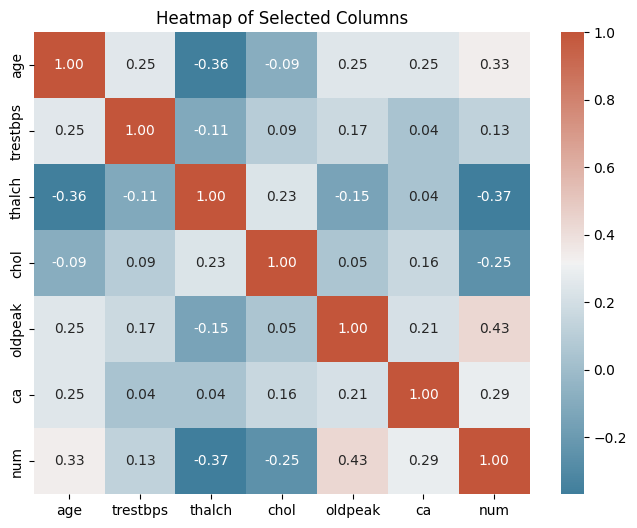

In [242]:
cols_for_heatmap = ['age', 'trestbps', 'thalch', 'chol', 'oldpeak', 'ca', 'num']
plt.figure(figsize=(8, 6))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(data[cols_for_heatmap].corr(), annot=True, cmap=cmap, fmt=".2f")
plt.title('Heatmap of Selected Columns')
plt.show()

### **Correlation Analysis Results** 📊

#### Strong Positive Correlations (+)
| Variables | Correlation | Interpretation |
|-----------|------------|----------------|
| num & ca | 0.52 | Strong relationship between disease and major vessels |
| oldpeak & num | 0.43 | Moderate link between ST depression and disease |

```python
# Key Finding: Disease likelihood increases with these factors
```

#### Negative Correlations (-)
##### Clinical Indicators:
- **Heart Rate & Disease** (thalach & num)
  - Correlation: -0.37
  - Insight: Lower heart rates → Higher disease risk

- **Age & Heart Rate** (age & thalach)
  - Correlation: -0.36
  - Insight: Older age → Lower maximum heart rates

#### Weak/Insignificant Correlations
##### Minimal Impact Factors:
```
1. Cholesterol (chol):
   - Weak overall correlation (-0.25)
   - Limited predictive value

2. Resting Blood Pressure (trestbps):
   - Negligible correlation (0.13)
   - Not a reliable standalone indicator
```

---
*Note: Correlations should be considered alongside other clinical factors for comprehensive diagnosis*

# **Manual Risk Score Calculation**

## 1. Data Cleaning

In [200]:
# Remove missing values for key variables
data.dropna(subset=['trestbps', 'thalch', 'chol', 'age'], inplace=True)

## 2. Risk Score Calculation
### Weighted Formula:

In [201]:
def normalised (x):
  return (data[x] - data[x].mean()) / data[x].std()

data['risk_score'] = (
    0.20 * normalised('age') +      # 20% weight
    0.30 * normalised('chol') +     # 30% weight
    0.25 * normalised('trestbps') + # 25% weight
    0.25 * normalised('thalch')     # 25% weight
)

## 3. Risk Categorization

In [202]:
# Create risk categories
risk_bins = [0, 50, 75, 100]
risk_labels = ['low', 'medium', 'high']
data['risk_category'] = pd.cut(data['risk_score'],
                              bins=risk_bins,
                              labels=risk_labels)
data[['heart_disease', 'risk_score', 'num']]

,heart_disease,risk_score,num
0,0,0.587060,0
1,1,0.608920,2
2,1,0.132096,1
3,0,0.236338,0
4,0,0.052730,0
...,...,...,...
913,1,0.449551,1
914,1,0.057201,2
915,1,0.468514,1
917,1,-0.393811,2


---
*Note: Risk scores are standardized and weighted based on clinical importance of factors*

## 4. Visualisation

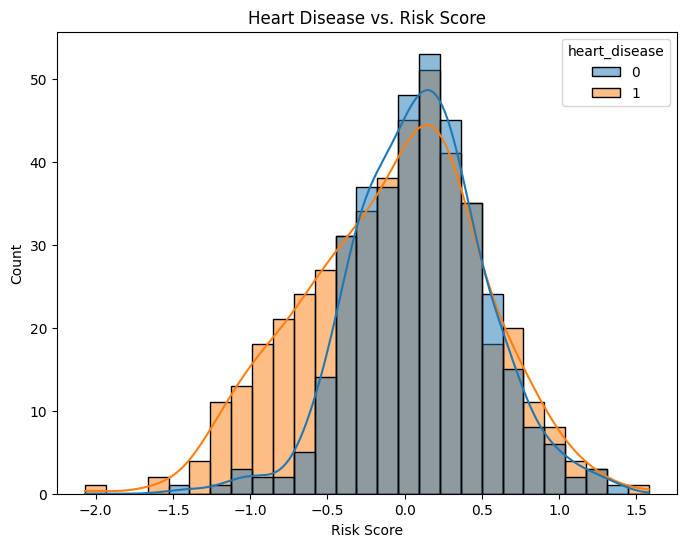

In [203]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='risk_score', hue='heart_disease', kde=True)
plt.title('Heart Disease vs. Risk Score')
plt.xlabel('Risk Score')
plt.ylabel('Count')
plt.show()

## **Key Observations 📋**

#### 1. Distribution Shape
- **Bell Curve Pattern**: Roughly normal distribution for both groups
- **Overlap**: Significant overlap between disease (1) and no disease (0) groups
- **Peak**: Highest concentration around 0.0 to 0.5 risk score

#### 2. Clinical Implications
- **Risk Score Reliability**: Not perfect predictor (due to overlap)
- **Threshold Consideration**: Risk scores below -0.5 suggest higher disease probability
- **Screening Tool**: Can be used for initial assessment, but not definitive diagnosis

# **Data Preprocessing and Classification**

##Data Cleaning and Preprocessing

In [204]:
data

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,heart_disease,risk_score,risk_category
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0,0,0.587060,low
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2,1,0.608920,low
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1,1,0.132096,low
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0,0,0.236338,low
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0,0,0.052730,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,914,62,Male,VA Long Beach,asymptomatic,158.0,170.0,False,st-t abnormality,138.0,True,0.0,NaN,NaN,NaN,1,1,0.449551,low
914,915,46,Male,VA Long Beach,asymptomatic,134.0,310.0,False,normal,126.0,False,0.0,NaN,NaN,normal,2,1,0.057201,low
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1,1,0.468514,low
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2,1,-0.393811,NaN


In [205]:
data.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num',
       'heart_disease', 'risk_score', 'risk_category'],
      dtype='object')

In [206]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 834 entries, 0 to 919
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             834 non-null    int64   
 1   age            834 non-null    int64   
 2   sex            834 non-null    object  
 3   dataset        834 non-null    object  
 4   cp             834 non-null    object  
 5   trestbps       834 non-null    float64 
 6   chol           834 non-null    float64 
 7   fbs            745 non-null    object  
 8   restecg        832 non-null    object  
 9   thalch         834 non-null    float64 
 10  exang          834 non-null    object  
 11  oldpeak        827 non-null    float64 
 12  slope          600 non-null    object  
 13  ca             308 non-null    float64 
 14  thal           429 non-null    object  
 15  num            834 non-null    int64   
 16  heart_disease  834 non-null    int64   
 17  risk_score     834 non-null    float64 


To handle missing values during data preprocessing of this health dataset, we can replace missing numerical values with the mean (average) and fill in missing categorical values with the mode (most frequent value).

In [207]:
for col in ['trestbps', 'chol', 'thalch', 'oldpeak']:
    data[col] = data[col].fillna(data[col].mean())

for col in data.columns:
    if data[col].isnull().any():
        if col not in ['trestbps', 'chol', 'thalch', 'oldpeak']:
          most_frequent = data[col].mode()[0]
          data[col] = data[col].fillna(most_frequent)

<ipython-input-207-36d037770bb3>:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[col] = data[col].fillna(most_frequent)


We use the function `train_test_split()` to split
the data into training and validation sets. As there are 834 observations,
we split into two sets using the
argument `test_size=0.2`. We set the random seed of the splitter
with the argument `random_state=0`.

In [208]:
features = data.drop(columns=['id', 'dataset', 'risk_score', 'risk_category', 'heart_disease', 'num'])
features = pd.get_dummies(features,
                          columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'],
                          drop_first=True)
target = data['heart_disease']

heartuci_train, heartuci_test, y_train, y_test = train_test_split(features,
                                                                  target,
                                                                  test_size=0.2,
                                                                  random_state=12)



## Logistic Regression
Next, we will fit a logistic regression model in order to predict
 `heart_disease`. The `sm.GLM()`  function fits *generalized linear models*, a class of
models that includes logistic regression.  Alternatively,
the function `sm.Logit()` fits a logistic regression
model directly. We must pass in the argument `family=sm.families.Binomial()`
in order to tell `statsmodels` to run a logistic regression rather than some other
type of generalized linear model.

In [209]:
design = MS(heartuci_train)
X_train = design.fit_transform(heartuci_train)
glm = sm.GLM(y_train,
             X_train,
             family=sm.families.Binomial())
results = glm.fit()
summarize(results)

,coef,std err,z,P>|z|
intercept,1.0289,1.640,0.627,0.530
age,0.0055,0.014,0.384,0.701
trestbps,0.0065,0.006,1.065,0.287
chol,-0.0046,0.001,-4.053,0.000
thalch,-0.0143,0.005,-2.690,0.007
oldpeak,0.4859,0.125,3.897,0.000
ca,0.8087,0.240,3.371,0.001
sex_Male,0.9600,0.282,3.407,0.001
cp_atypical angina,-2.0047,0.343,-5.849,0.000
cp_non-anginal,-1.6182,0.275,-5.892,0.000


One of the smallest *p*-value here is associated with  `angina` predictor. The
negative coefficient for this predictor suggests that if their value
had a true (1), then the patient is less likely to have heart disease (0).

The `predict()`  method of `results` can be used to predict the
probability that a patient has heart disease, given values of the
predictors. This method returns predictions
on the probability scale. We pass an `exog` argument consistent
with a design matrix to obtain predicted probabilities of `X_test`, after fitting it on `X_train`.

In [210]:
X_test = design.transform(heartuci_test)
probs = results.predict(exog=X_test)
np.array(probs[:10])

array([0.31595994, 0.06443798, 0.05664525, 0.83515124, 0.44726243,
       0.05762631, 0.97432858, 0.87041712, 0.8640662 , 0.81993909])

In order to make a prediction as to whether the patient has heart disease or not, we must convert these predicted
probabilities into class labels,  0  or  1, based on
whether the predicted probability of a heart disease is greater than
or less than 0.5.

In [211]:
labels = np.where(probs > 0.5, 1, 0)
print(labels[:10])

[0 0 0 1 0 0 1 1 1 1]


The `confusion_table()`
function from the `ISLP` package summarizes these predictions, showing   how
many observations were correctly or incorrectly classified.
The `confusion_table()` function takes as first argument the
predicted labels, and second argument the true labels.

In [212]:
confusion_table(labels, y_test)

Truth,0,1
Predicted,,
0,65,12
1,13,77


In [213]:
np.mean(labels == y_test)

0.8502994011976048

In [214]:
train_probs = results.predict()
labels = np.where(train_probs > 0.5, 1, 0)
np.mean(labels == y_train)

0.8320839580209896

Let us analyze how varying the classification threshold affects our logistic regression model's accuracy. Below, we visualize the relationship between threshold selection and model performance, helping identify an optimal threshold that balances accuracy across datasets.

The threshold we assumed (0.5) was a relatively good choice.

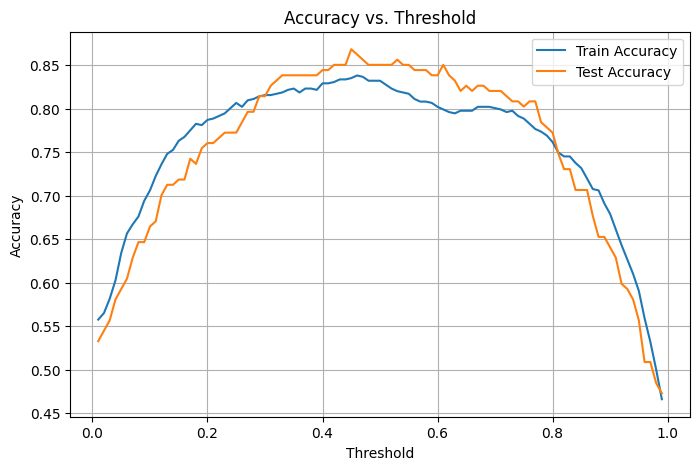

In [215]:
thresholds = np.arange(0.01, 1, 0.01)

# Calculate accuracy for different thresholds
train_accuracy = []
test_accuracy = []
for threshold in thresholds:
  train_pred = (results.predict(X_train) > threshold).astype(int)
  test_pred = (probs > threshold).astype(int)

  train_accuracy.append(accuracy_score(y_train, train_pred))
  test_accuracy.append(accuracy_score(y_test, test_pred))

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(thresholds, train_accuracy, label='Train Accuracy')
plt.plot(thresholds, test_accuracy, label='Test Accuracy')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()

## Linear Discriminant Analysis

In [216]:
lda = LDA(store_covariance=True)

Since the `LDA` estimator automatically
adds an intercept, we should remove the column corresponding to the
intercept in both `X_train` and `X_test`. We can also directly
use the labels rather than the Boolean vectors `y_train`.

In [217]:
X_train, X_test = [M.drop(columns=['intercept'])
                   for M in [X_train, X_test]]
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(store_covariance=True)

In [218]:
lda.classes_, lda.scalings_

(array([0, 1]),
 array([[ 0.00604336],
        [ 0.00267449],
        [-0.00263937],
        [-0.00850564],
        [ 0.26169371],
        [ 0.36479299],
        [ 0.5902218 ],
        [-1.38518768],
        [-1.09129654],
        [-0.54036568],
        [ 0.30871175],
        [ 0.16544743],
        [ 0.3237009 ],
        [ 0.55671935],
        [ 0.22349217],
        [-0.11668161],
        [-0.39824235],
        [ 0.12606826]]))

In [219]:
lda_pred = lda.predict(X_test)
confusion_table(lda_pred, y_test)

Truth,0,1
Predicted,,
0,64,12
1,14,77


In [220]:
np.mean(lda_pred == y_test)

0.844311377245509

As we observed in our comparison of classification methods,  the LDA and logistic
regression predictions are almost identical.

## Quadratic Discriminant Analysis
We will now fit a QDA model to the  data. QDA is
implemented via
`QuadraticDiscriminantAnalysis()`
in the `sklearn` package, which we abbreviate to `QDA()`.
The syntax is very similar to `LDA()`.

In [221]:
qda = QDA(store_covariance=True)
qda.fit(X_train, y_train)

QuadraticDiscriminantAnalysis(store_covariance=True)

In [222]:
qda_pred = qda.predict(X_test)
confusion_table(qda_pred, y_test)

Truth,0,1
Predicted,,
0,64,17
1,14,72


In [223]:
np.mean(qda_pred == y_test)

0.8143712574850299

As we again observed in our comparison of classification methods,  the LDA, QDA and logistic
regression predictions are almost similar.

## Naive Bayes
Next, we fit a naive Bayes model to the data. The syntax is
similar to that of `LDA()` and `QDA()`. By
default, this implementation `GaussianNB()` of the naive Bayes classifier models each
quantitative feature using a Gaussian distribution. However, a kernel
density method can also be used to estimate the distributions.

In [224]:
NB = GaussianNB()
NB.fit(X_train, y_train)

nb_labels = NB.predict(X_test)
confusion_table(nb_labels, y_test)

np.mean(nb_labels == y_test)

0.7844311377245509

- Above models achieved similar accuracy
- LDA's ability to model feature covariance provided little additional benefit
- Class overlap appears to be a limiting factor for both models' performance

## K-Nearest Neighbors
We will now perform KNN using the `KNeighborsClassifier()` function. This function works similarly
to the other model-fitting functions that we have
encountered thus far.

A good way to handle scaling problem is to *standardize*  the data so that all variables are
given a mean of zero and a standard deviation of one. Then all
variables will be on a comparable scale. This is accomplished
using
the `StandardScaler()`
transformation.

In [225]:
scaler = StandardScaler(with_mean=True,
                        with_std=True,
                        copy=True)

In [226]:
scaler.fit(features)
X_std = scaler.transform(features)
X_std = pd.DataFrame(X_std, columns=features.columns)

Splitting the standardised dataset into training and test sets using `train_test_split()`, using `test_size=0.2`.

In [227]:
X_knn_train, X_knn_test, y_knn_train, y_knn_test = train_test_split(np.asarray(X_std),
                                                                  target,
                                                                  test_size=0.2,
                                                                  random_state=0)

For KNN model performance analysis, the following plot helps identify the optimal k value that balances model complexity (avoiding overfitting with low k) and generalization (avoiding underfitting with high k) where `n_neighbors=k`.

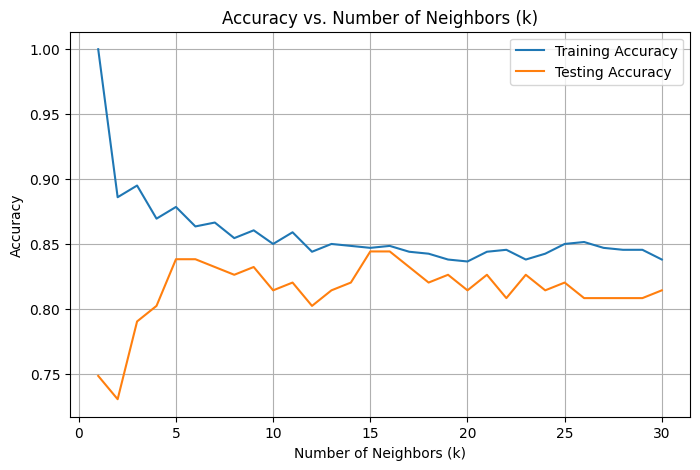

In [228]:
neighbors = range(1, 31)
train_accuracy = []
test_accuracy = []

for k in neighbors:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_knn_train, y_knn_train)

  train_pred = knn.predict(X_knn_train)
  test_pred = knn.predict(X_knn_test)

  train_accuracy.append(accuracy_score(y_knn_train, train_pred))
  test_accuracy.append(accuracy_score(y_knn_test, test_pred))


plt.figure(figsize=(8, 5))
plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.legend()
plt.grid(True)
plt.show()

In [232]:
knn1 = KNeighborsClassifier(n_neighbors=15)
knn1_pred = knn1.fit(X_knn_train, y_knn_train).predict(X_knn_test)
confusion_table(knn1_pred, y_knn_test)

Truth,0,1
Predicted,,
0,61,12
1,14,80


In [230]:
np.mean(y_knn_test == knn1_pred)

0.844311377245509

##**Model Performance Comparison 📈**

Below is a comparison of different classification models tested on the Heart Disease UCI dataset:

| Model | Accuracy |
|-------|----------|
| Logistic Regression | >85.71% |
| Linear Discriminant Analysis | 84.431% |
| Quadratic Discriminant Analysis | 81.437% |
| Naive Bayes | 78.443% |
| K-Nearest Neighbors (k=15) | 84.431% |

*Key Observations:*
- Logistic Regression achieved the highest accuracy
- LDA and KNN with optimal k=13 performed identically
- QDA performed second-best followed by Naive Bayes
- All models showed reasonable performance around 80-85%

Note: These results suggest that for this dataset, simpler linear models (like Logistic Regression) perform competitively compared to more complex approaches.